# Project Final Submission Template

You must sign up for a canvas Project Group on the People page even if you're working alone.

Student 1: Hana Zhang

Student 2: N/A
    
Canvas Project Group Number: 6

### Step 1a: Planning 
#### Identify the information in the file your program will read

The data contains 2467 entries across 4 columns. Each entry represents a unique positive Covid-19 case in British Columbia, and the categories provide information on the date of report, the health authority that reported it, the sex of the patient, and the age range to which the patient belongs. 

Date (Reported_Date): From 2020-01-26 to 2020-05-20

Health Authority (HA): 1 of 5 (Fraser, Interior, Northern, Vancouver Coastal, Vancouver Island)

Sex: 1 of 3 (M, F, U)

Age (Age_Group): 1 of 11 (<10, 10-19, 20-29, ..., 80-89, 89+, Unknown)

### Step 1b: Planning 
#### Brainstorm ideas for what your program will produce
#### Select the idea you will build on for subsequent steps

Idea 1: Produce a line chart with Time (weeks) on the x-axis and Percentage of Cases (%) on the y-axis, with 4 lines each representing a different age group's proportion of all cases each week (10-29, 30-49, 50-69, 70-89).

Idea 2: Produce a bar graph with Health Authorities on the x-axis and Average Number of Cases per Month on the y-axis, with two bars representing M and F sex categories.

Idea 3: Produce a line chart with Time (weeks) on the x-axis and Percetage of Cases (%) on the y-axis, with 2 lines each representing either the M or F's proportion of all cases each week.

I will be working towards generating the line chart in Idea 1.

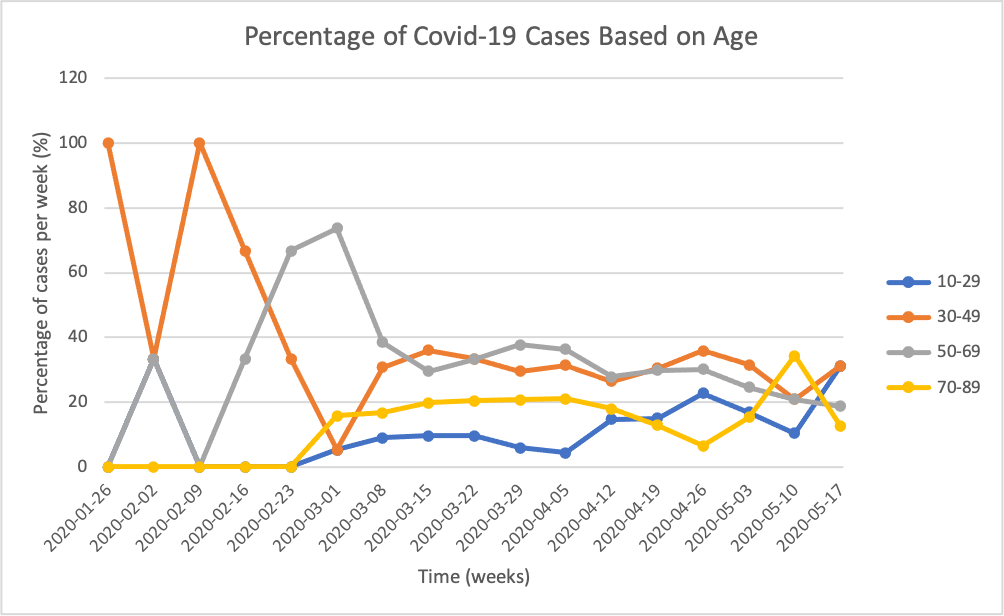### Step 1c: Planning 
#### Write or draw examples of what your program will produce

Double click this cell to edit. 

You must include an image that shows what your chart or plot will look like. You can insert an image using the Insert Image command near the bottom of the Edit menu.

### Step 2a: Building
#### Document which information you will represent in your data definitions
#### Design data definitions

I will first need a Date compound data type to store the dates as a month and a day (both as int) in 2020. I will need Date in order to tally weekly incidences as well as create the x-axis of my line graph.

I will need to store each entry as a CovidDiagnosis compound data type because I need to count the number of entries of a particular date and age range. I will also need a list data type to store the entries once they are read from the csv file. In particular, I will be using the date and age accessors of CovidDiagnosis to filter and group my data.

I will also need an Age enum data type to group the ages given in the csv file into the four larger age groups that I want to represent on my line graph.

In [1]:
from cs103 import *
from typing import NamedTuple, List, Optional
from enum import Enum
import csv
import math
import matplotlib.pyplot as pyplot

In [2]:
##################
# Data Definitions

Date = NamedTuple('Date', [('month', int),   # in range [1, 12]
                           ('day', int)])    # in range [1, 31]
# interp. a date in 2020 with a month an a day

D1 = Date(1, 13)
D2 = Date(3, 31)

@typecheck
def fn_for_date(d: Date) -> ...: # template based on Compound
    return ...(d.month,
               d.day)


AgeGroup = Enum('AgeGroup', ['younger', 'middle', 'older', 'senior', 'other'])
# interp. an age as 10-29 ('younger'), 30-49 ('middle'), 50-69 ('older'), 70-89 ('senior')
# or 'other' if the age is Unknown, <10, or 89+
# examples are redundant for enumerations   

@typecheck
# template based on one of (5 cases) and atomic distinct (5 times)
def fn_for_age_group(ag: AgeGroup) -> ...:
    if ag == AgeGroup.younger:
        return ...
    elif ag == AgeGroup.middle:
        return ...
    elif ag == AgeGroup.older:
        return ...
    elif ag == AgeGroup.senior:
        return ...
    elif ag == AgeGroup.other:
        return ...


CovidDiagnosis = NamedTuple('CovidDiagnosis', [('week', int), 
                                               ('age', AgeGroup)])    
# interp. a Covid-19 diagnosis report with the week of the report (as the number of weeks since Jan. 26, 2020) 
# and the age of the patient (as a previously constructed AgeGroup)

CD1 = CovidDiagnosis(0, AgeGroup.middle)
CD2 = CovidDiagnosis(1, AgeGroup.senior)
CD3 = CovidDiagnosis(2, AgeGroup.other)


@typecheck
def fn_for_covid_diagnosis(cd: CovidDiagnosis) -> ...: # template based on Compound and reference rule
    return ...(cd.week,
               fn_for_age(cd.age))


# List[CovidDiagnosis]
# interp. a list of Covid Diagnoses

LOCD0 = []
LOCD1 = [CD1, CD2]

@typecheck
def fn_for_locd(locd: List[CovidDiagnosis]) -> ...: # template based on arbitrary-sized and reference rule
    # acc holds the number of CovidDiagnosis counted so far
    acc = ...      # type: 
    for cd in locd:
        acc = ...(fn_for_covid_diagnosis(cd), acc)

    return ...(acc)


<>:13: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:49: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:64: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:66: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:13: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:49: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:64: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<>:66: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
<ipython-input-2-bb014e472d9d>:13: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
  return ...(d.month,
<ipython-input-2-bb014e472d9d>:49: SyntaxWarning: 'ellipsis' object is not callable; perhaps you missed a comma?
  return ...(cd.week,
<ipython-input-2-bb014e472d9d>:64: SyntaxWarning: 

### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

In [13]:
###########
# Functions for reading csv file

@typecheck
def read(filename: str) -> List[CovidDiagnosis]:
    """    
    reads information from the specified file and returns a list of Covid-19 diagnoses in British Columbia 
    between January and May 2020
    """
    # return []  #stub
    # Template from HtDAP
    # locd contains the result so far
    locd = [] # type: List[CovidDiagnosis]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            cd = CovidDiagnosis(parse_week(row[0]), parse_age(row[3]))
            locd.append(cd)
    
    return locd

def parse_week(s: str) -> int:
    """
    takes a string data type and changes it into an int indicating the number of weeks since Jan. 26
    (ex. 2020-02-02 is 1 week since)
    """
    # return 0 # stub
    # template based on composition
    # 1. change str into a Date data type with a month and a day as ints
    # 2. get a numerical value corresponding to each month and day combination
    # 3. group numerical values to number of weeks after Jan. 26, 2020
    
    return get_week_value(get_time_value(parse_date(s)))

def parse_date(s: str) -> Date:
    """
    takes a string data type as input and changes it into a Date data type
    """
    # return D1 # stub
    # template
    return Date(parse_int(s[5:7]), parse_int(s[8:10]))

@typecheck
def get_time_value(d: Date) -> int:
    """
    takes in a Date and converts it into an integer
    """
    # return 0 # stub
    # template from Date
    if d.month == 1 or d.month == 3 or d.month == 5 or d.month == 7 or d.month == 9 or d.month == 11:
        return 30 * d.month + d.day - 1
    else:
        return 30 * d.month + d.day
    
@typecheck
def get_week_value(i: int) -> int:
    """
    returns the number of weeks since Jan. 26
    """
    # return 0 # stub
    # template
    return (math.floor((i + 1) / 7)) - 8    # math.floor rounds down to the next full int.

@typecheck
def parse_age(a: str) -> AgeGroup:
    """
    takes an age range and assigns it to 1 of 4 larger age groups of interest: 10-29 (younger), 
    30-49 (middle), 50-69 (older), 70-89 (senior), or a 5th group (<10, 89+, Unknown)
    that is not of interest (other)
    """
    # return AgeGroup.younger # stub
    # template based on AgeGroup
    if a == "10-19" or a == "20-29":
        return AgeGroup.younger
    elif a == "30-39" or a == "40-49":
        return AgeGroup.middle
    elif a == "50-59" or a == "60-69":
        return AgeGroup.older
    elif a == "70-79" or a == "80-89":
        return AgeGroup.senior
    else:
        return AgeGroup.other

# Begin testing
start_testing()

# Examples and tests for read
expect(read("BC_Covid_Test_1.csv"), [CovidDiagnosis(1, AgeGroup.younger), 
                                     CovidDiagnosis(1, AgeGroup.middle),
                                     CovidDiagnosis(2, AgeGroup.middle)])
expect(read("BC_Covid_Test_2.csv"), [CovidDiagnosis(0, AgeGroup.middle),
                                     CovidDiagnosis(1, AgeGroup.older)])

expect(parse_week("2020-01-26"), 0)
expect(parse_week("2020-02-02"), 1)
expect(parse_week("2020-02-04"), 1)
expect(parse_week("2020-02-12"), 2)

expect(parse_date("2020-02-05"), Date(2, 5))
expect(parse_date("2020-10-13"), Date(10, 13))

expect(get_time_value(Date(1, 26)), 1*30 + 26 - 1)
expect(get_time_value(Date(2, 14)), 2*30 + 14)
expect(get_time_value(Date(3, 6)), 3*30 + 6 - 1)
expect(get_time_value(Date(4, 30)), 4*30 + 30)

expect(get_week_value(55), 0)
expect(get_week_value(62), 1)
expect(get_week_value(64), 1)
expect(get_week_value(70), 2)

expect(parse_age("<10"), AgeGroup.other)
expect(parse_age("89+"), AgeGroup.other)
expect(parse_age("Unknown"), AgeGroup.other)
expect(parse_age("10-19"), AgeGroup.younger)
expect(parse_age("40-49"), AgeGroup.middle)
expect(parse_age("50-59"), AgeGroup.older)
expect(parse_age("80-89"), AgeGroup.senior)
       
# show testing summary
summary()

23 of 23 tests passed


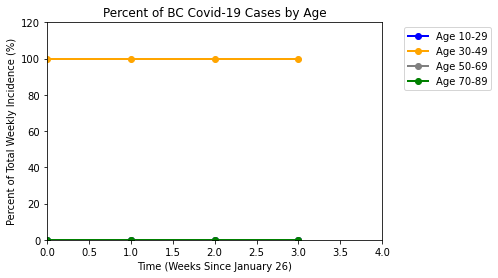

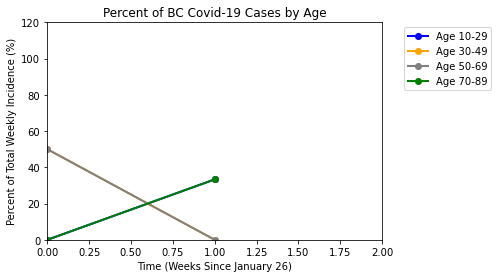

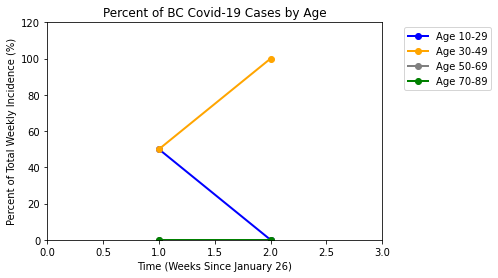

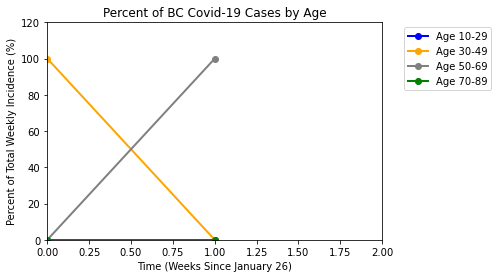

21 of 21 tests passed


In [19]:
###########
# Functions for analysis

@typecheck
def plot_percent_incidence_over_time_by_age(locd: List[CovidDiagnosis]) -> None:
    """
    display a plot of the percent of total weekly cases over time, where percent_incidence_10_29 is 
    the percent of all cases each week attributed to someone aged 10 to 29 years, percent_incidence_30_49 is
    the percent of all cases each week attributed to someone aged 30 to 49 years, etc., and 
    weeks is a list of int indicating the number of weeks after Jan. 26 (each week is seven days so week = 1 
    counts the number of cases from Jan. 26 up to but not including Feb. 2) until May 17 (week = 17)
    
    Assumes the lengths of percent_incidence_10_29, percent_incidence_30_49, percent_incidence_50_69,
    percent_incidence_70_89, and weeks are all the same.
    """
    # return None #stub
    # Template based on visualization
    
    weeks = get_week(locd)
    percent_incidence_10_29 = get_percent(locd, weeks, AgeGroup.younger)
    percent_incidence_30_49 = get_percent(locd, weeks, AgeGroup.middle)
    percent_incidence_50_69 = get_percent(locd, weeks, AgeGroup.older)
    percent_incidence_70_89 = get_percent(locd, weeks, AgeGroup.senior)

    # set the x-axis label, y-axis label, and plot title
    pyplot.xlabel('Time (Weeks Since January 26)')
    pyplot.ylabel('Percent of Total Weekly Incidence (%)')
    pyplot.title('Percent of BC Covid-19 Cases by Age')

    # range for the axes
    # [x-min, x-max, y-min, y-max]
    pyplot.axis([0, max(weeks) + 1, 0, 120])

    # plot our data 
    a1 = pyplot.plot(weeks, percent_incidence_10_29)
    a2 = pyplot.plot(weeks, percent_incidence_30_49)
    a3 = pyplot.plot(weeks, percent_incidence_50_69)
    a4 = pyplot.plot(weeks, percent_incidence_70_89)
    
    # set some properties for the lines, a1, a2, a3, and a4 (4 different colors, line width to 2, 
    # marker to a small circle, and a label for each)
    pyplot.setp(a1, color='blue', linewidth=2.0, marker="o", label="Age 10-29")
    pyplot.setp(a2, color='orange', linewidth=2.0, marker="o", label="Age 30-49")
    pyplot.setp(a3, color='grey', linewidth=2.0, marker="o", label="Age 50-69")
    pyplot.setp(a4, color='green', linewidth=2.0, marker="o", label="Age 70-89")
    
    # show the legend because this plot contains four lines. The arguments will place
    # the legend to the right of the plot
    pyplot.legend(bbox_to_anchor=(1.05, 1), loc=2)

    # show the plot
    pyplot.show()
    
    return None

###########
# Helper for x-axis

@typecheck
def get_week(locd: List[CovidDiagnosis]) -> List[int]:
    """
    takes in a list of cd and returns a list of week numbers post Jan. 26
    """
    # return [] # stub
    # template from List[CovidDiagnosis] 
    week = [] # type: List[int]
     # type: CovidDiagnosis
    for cd in locd: 
        if cd.week not in week:
            week.append(cd.week)
            
    return week

###########
# Helpers for y-axis

@typecheck
def get_percent(locd: List[CovidDiagnosis], loi: List[int], ag: AgeGroup) -> List[float]:
    """
    takes a list of Covid Diagnoses and returns a list of percentages representing the percent of weekly
    total diagnoses in each week (i weeks after Jan. 26) attributed to a given age group
    """
    # return [] # stub
    # template based on List[int]
    # percent holds the list of percentages calculated so far
    percent = [] # Type: List[float]
    for i in loi:
        percent.append((combine_filtered_counts_for_week(locd, i, ag)) / (combine_counts_for_week(locd, i)) * 100)
        
    return percent
            
@typecheck
def combine_filtered_counts_for_week(locd: List[CovidDiagnosis], i: int, ag: AgeGroup) -> int:
    """
    finds filtered incidence by age group for given week since Jan. 26
    """
    # return 0 # stub
    # template based on List[CovidDiagnosis]
    # fil_total will hold the incidence of cases in a given age group seen so far for i weeks since Jan. 26
    fil_total = 0 # Type: int
    for cd in locd:
        if weeks_match(cd, i) and cd.age == ag:
            fil_total = fil_total + 1
            
    return fil_total

@typecheck
def combine_counts_for_week(locd: List[CovidDiagnosis], i: int) -> int:
    """
    finds total incidence for given week since Jan. 26
    """
    # return 0 # stub
    # template based on List[CovidDiagnosis]
    # total will hold the incidence of cases seen so far for i weeks since Jan. 26
    total = 0 # Type: int
    for cd in locd:
        if weeks_match(cd, i):
            total = total + 1
            
    return total

@typecheck
def weeks_match(cd: CovidDiagnosis, i: int) -> bool:
    """
    returns True if the Covid diagnosis was made in i weeks since Jan. 26; False otherwise 
    """
    # return True # stub
    # template based on CovidDiagnosis
    return cd.week == i


start_testing()

CD1 = CovidDiagnosis(0, AgeGroup.middle)
CD2 = CovidDiagnosis(0, AgeGroup.middle)
CD3 = CovidDiagnosis(1, AgeGroup.middle)
CD4 = CovidDiagnosis(1, AgeGroup.middle)
CD5 = CovidDiagnosis(1, AgeGroup.middle)
CD6 = CovidDiagnosis(2, AgeGroup.middle)
CD7 = CovidDiagnosis(3, AgeGroup.middle)
CD8 = CovidDiagnosis(4, AgeGroup.middle)
CD9 = CovidDiagnosis(5, AgeGroup.middle)
CD10 = CovidDiagnosis(0, AgeGroup.middle)
CD11 = CovidDiagnosis(0, AgeGroup.older)
CD12 = CovidDiagnosis(1, AgeGroup.senior)
CD13 = CovidDiagnosis(1, AgeGroup.other)
CD14 = CovidDiagnosis(1, AgeGroup.younger)

LOCD1 = [CD1, CD2, CD3, CD4, CD5, CD6, CD7]
LOCD2 = [CD10, CD11, CD12, CD13, CD14]
LOCD3 = [CD1, CD2, CD3, CD4, CD5, CD6, CD7, CD8, CD9, CD10, CD11, CD12, CD13, CD14]

# Should produce an empty graph with x-axis "Time (Weeks Since January 26)", 
# y-axis "Percent of Total Weekly Incidence (%)",
# title "Percent of BC Covid-19 Cases by Age", and a legend showing Age 10-29, 30-49, 50-69, 70-89:
#expect(plot_percent_incidence_over_time_by_age([]), None)

# Should produce a graph with labels as above; content sketched in the 
# markdown cell below.

expect(plot_percent_incidence_over_time_by_age(LOCD1), None)
expect(plot_percent_incidence_over_time_by_age(LOCD2), None)

expect(plot_percent_incidence_over_time_by_age(read("BC_Covid_Test_1.csv")), None)
expect(plot_percent_incidence_over_time_by_age(read("BC_Covid_Test_2.csv")), None)

# Examples and tests for analyze 

expect(get_week([]), [])
expect(get_week(LOCD1), [0, 1, 2, 3])

expect(get_percent([], [], AgeGroup.middle), [])
expect(get_percent(LOCD1, [0, 1, 2, 3], AgeGroup.middle), [100, 100, 100, 100])
expect(get_percent(LOCD2, [0, 1], AgeGroup.older), [50, 0])
expect(get_percent([CD10, CD11, CD12, CD13, CD14, CovidDiagnosis(1, AgeGroup.senior)], [0, 1], AgeGroup.senior), 
       [0, 50])
expect(get_percent([CD10, CD11, CD12, CD13, CD14, CovidDiagnosis(0, AgeGroup.older)], [0, 1], AgeGroup.older), 
       [2 / 3 * 100, 0])

expect(combine_counts_for_week([], 0), 0)
expect(combine_counts_for_week(LOCD1, 0), 2)
expect(combine_counts_for_week(LOCD1, 1), 3)
expect(combine_counts_for_week(LOCD2, 1), 3)

expect(combine_filtered_counts_for_week([], 0, AgeGroup.middle), 0)
expect(combine_filtered_counts_for_week(LOCD1, 0, AgeGroup.middle), 2)
expect(combine_filtered_counts_for_week(LOCD1, 0, AgeGroup.younger), 0)
expect(combine_filtered_counts_for_week(LOCD2, 1, AgeGroup.senior), 1)

expect(weeks_match(CD10, 0), True)
expect(weeks_match(CD10, 2), False)

summary()

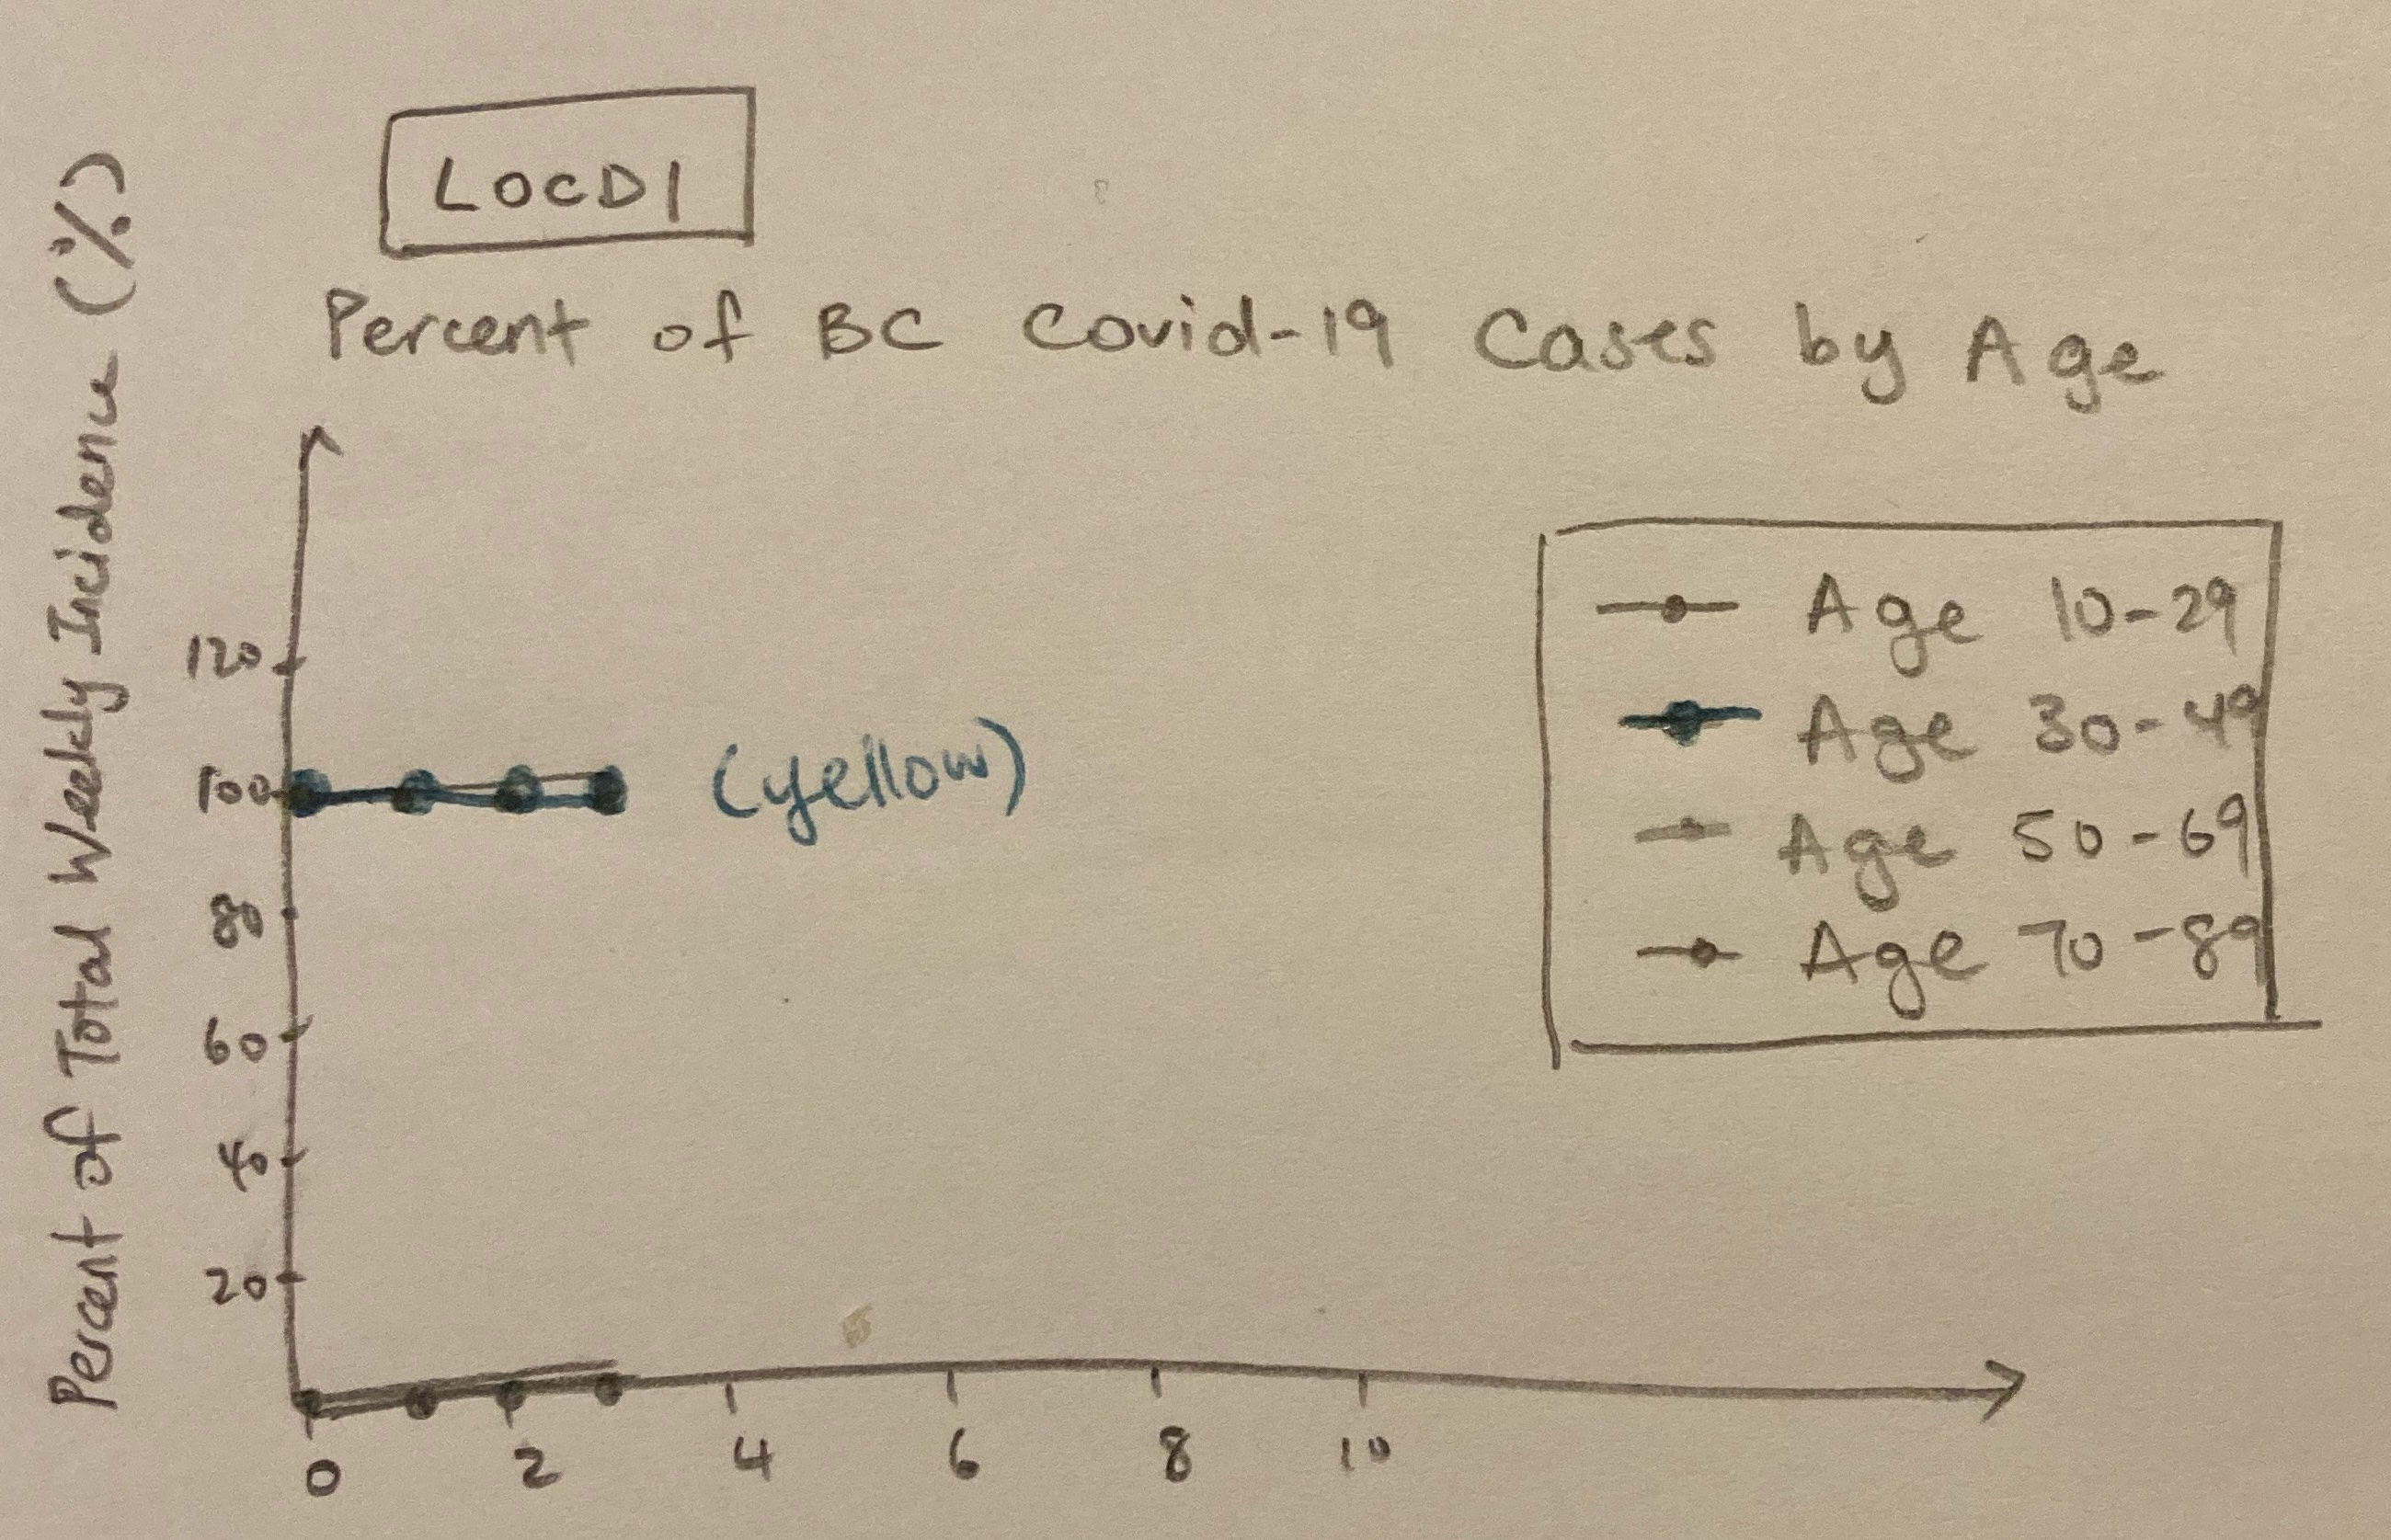
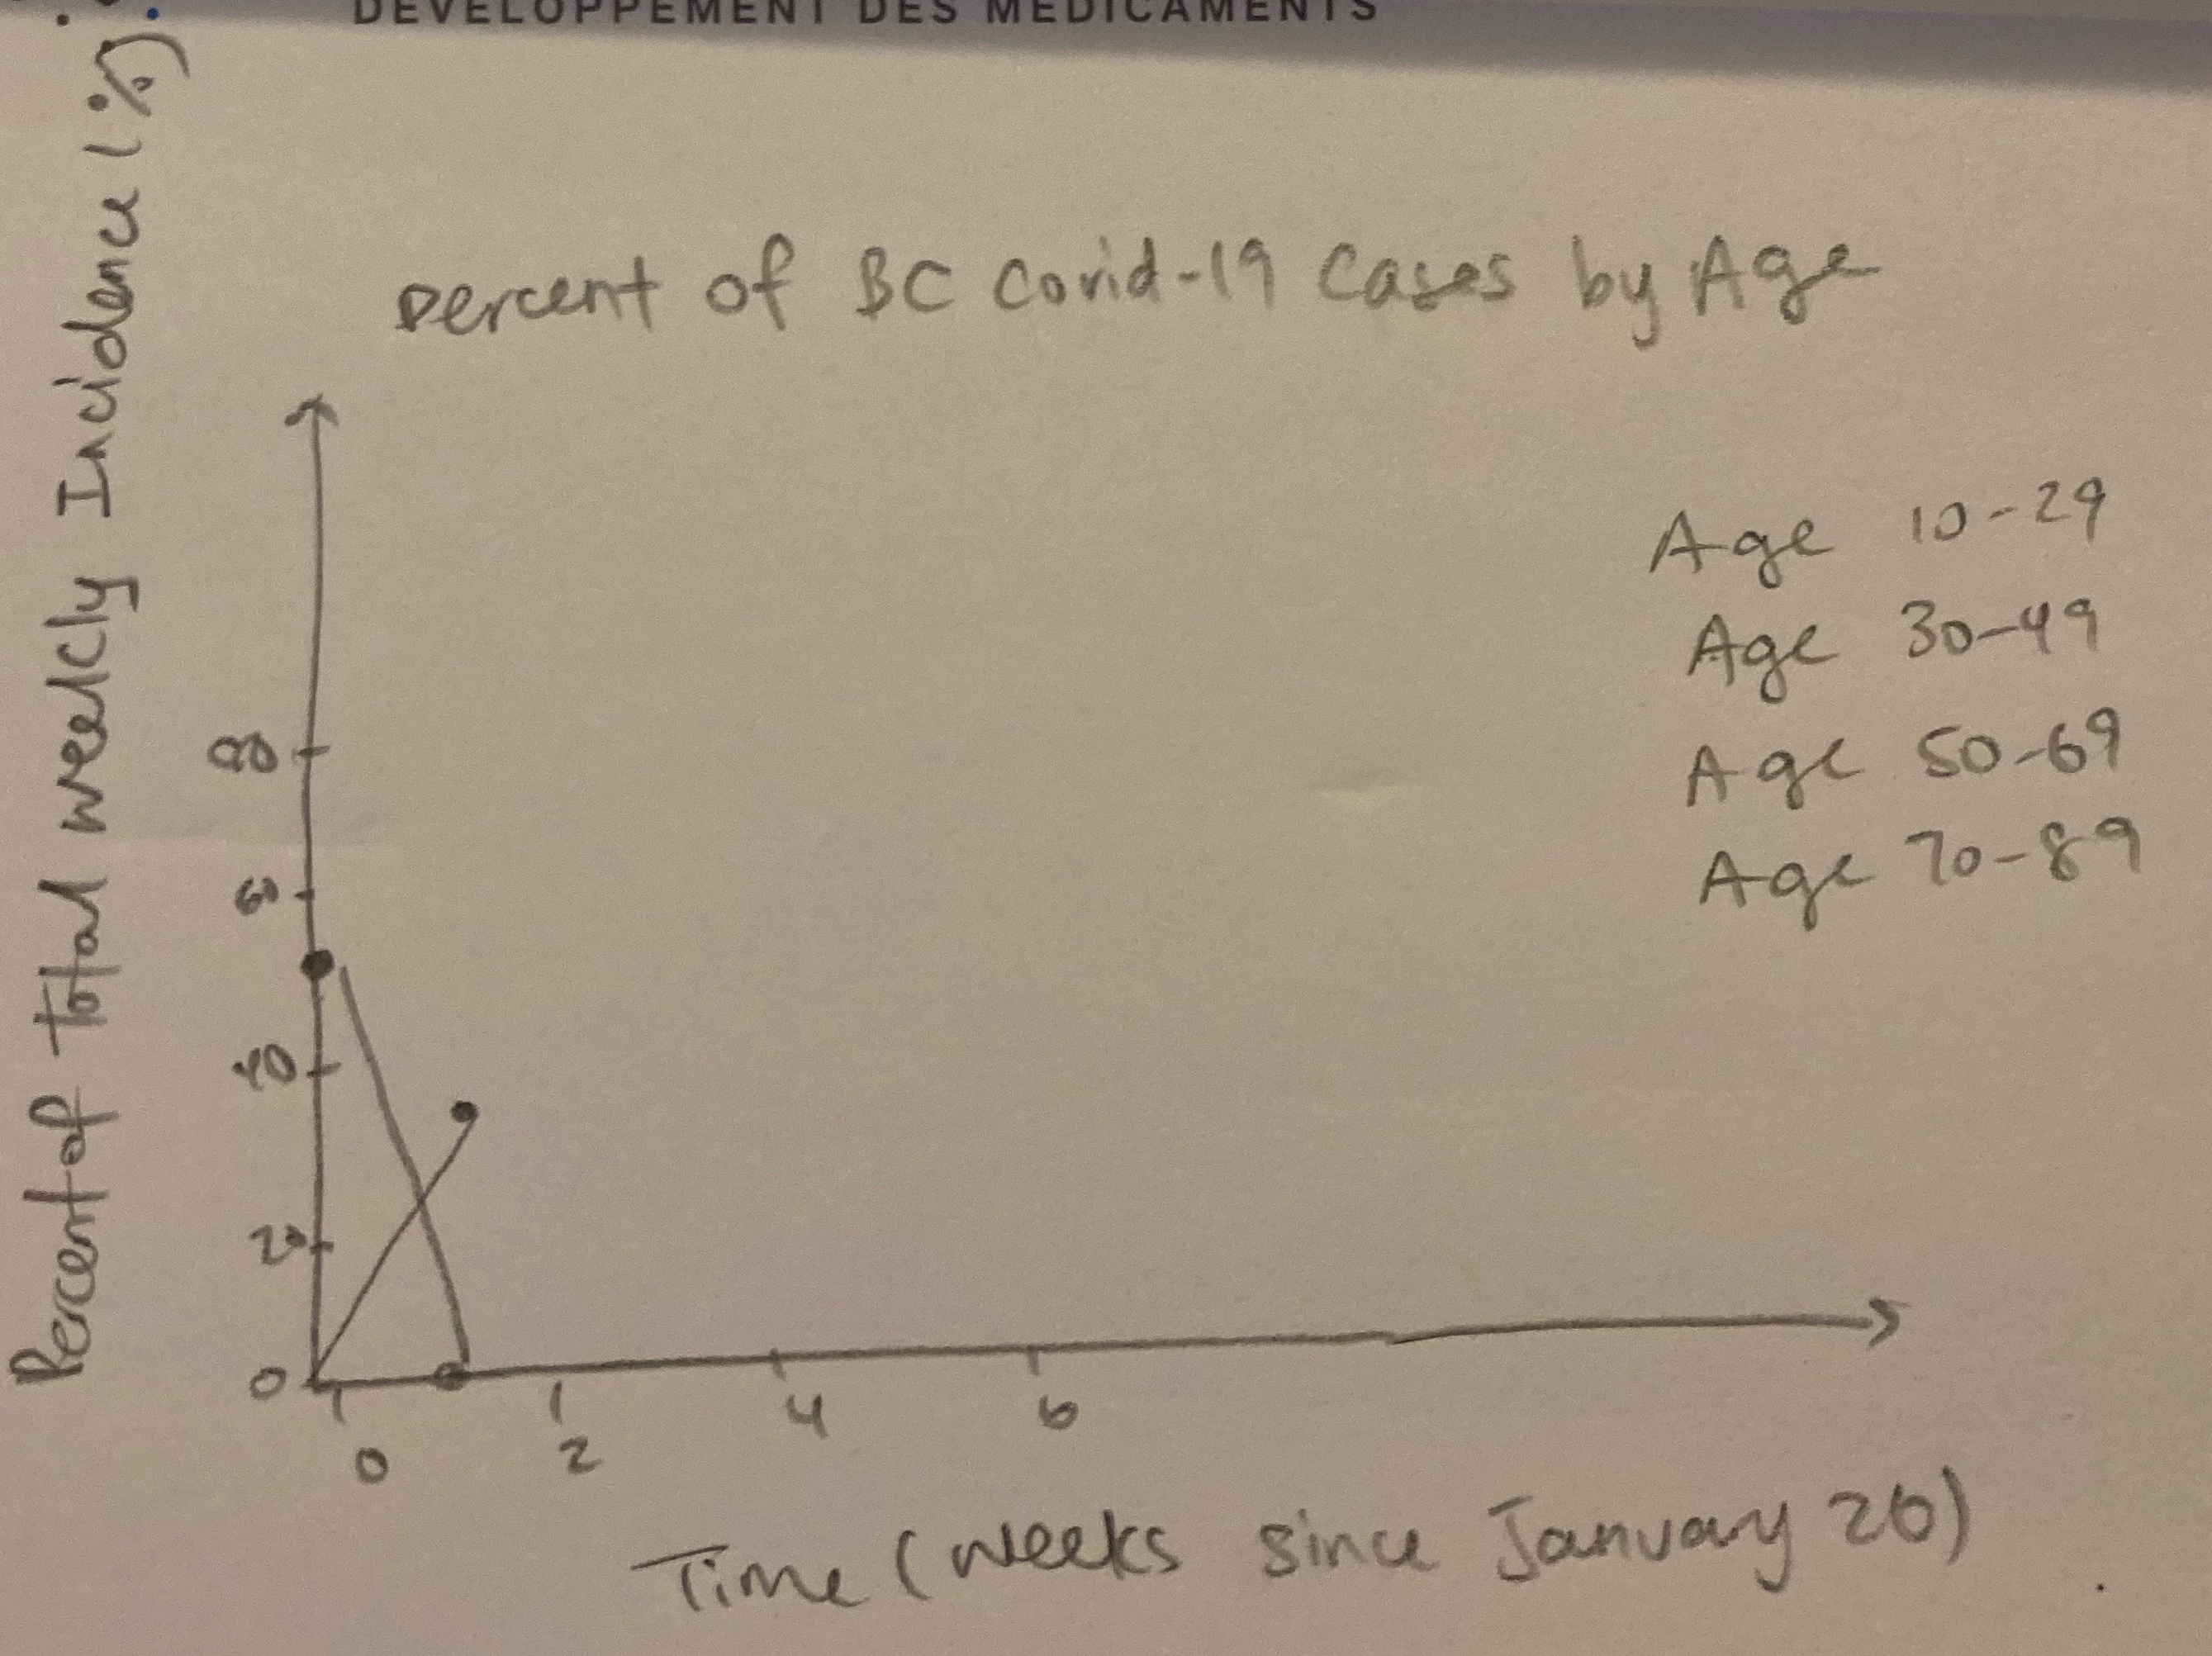
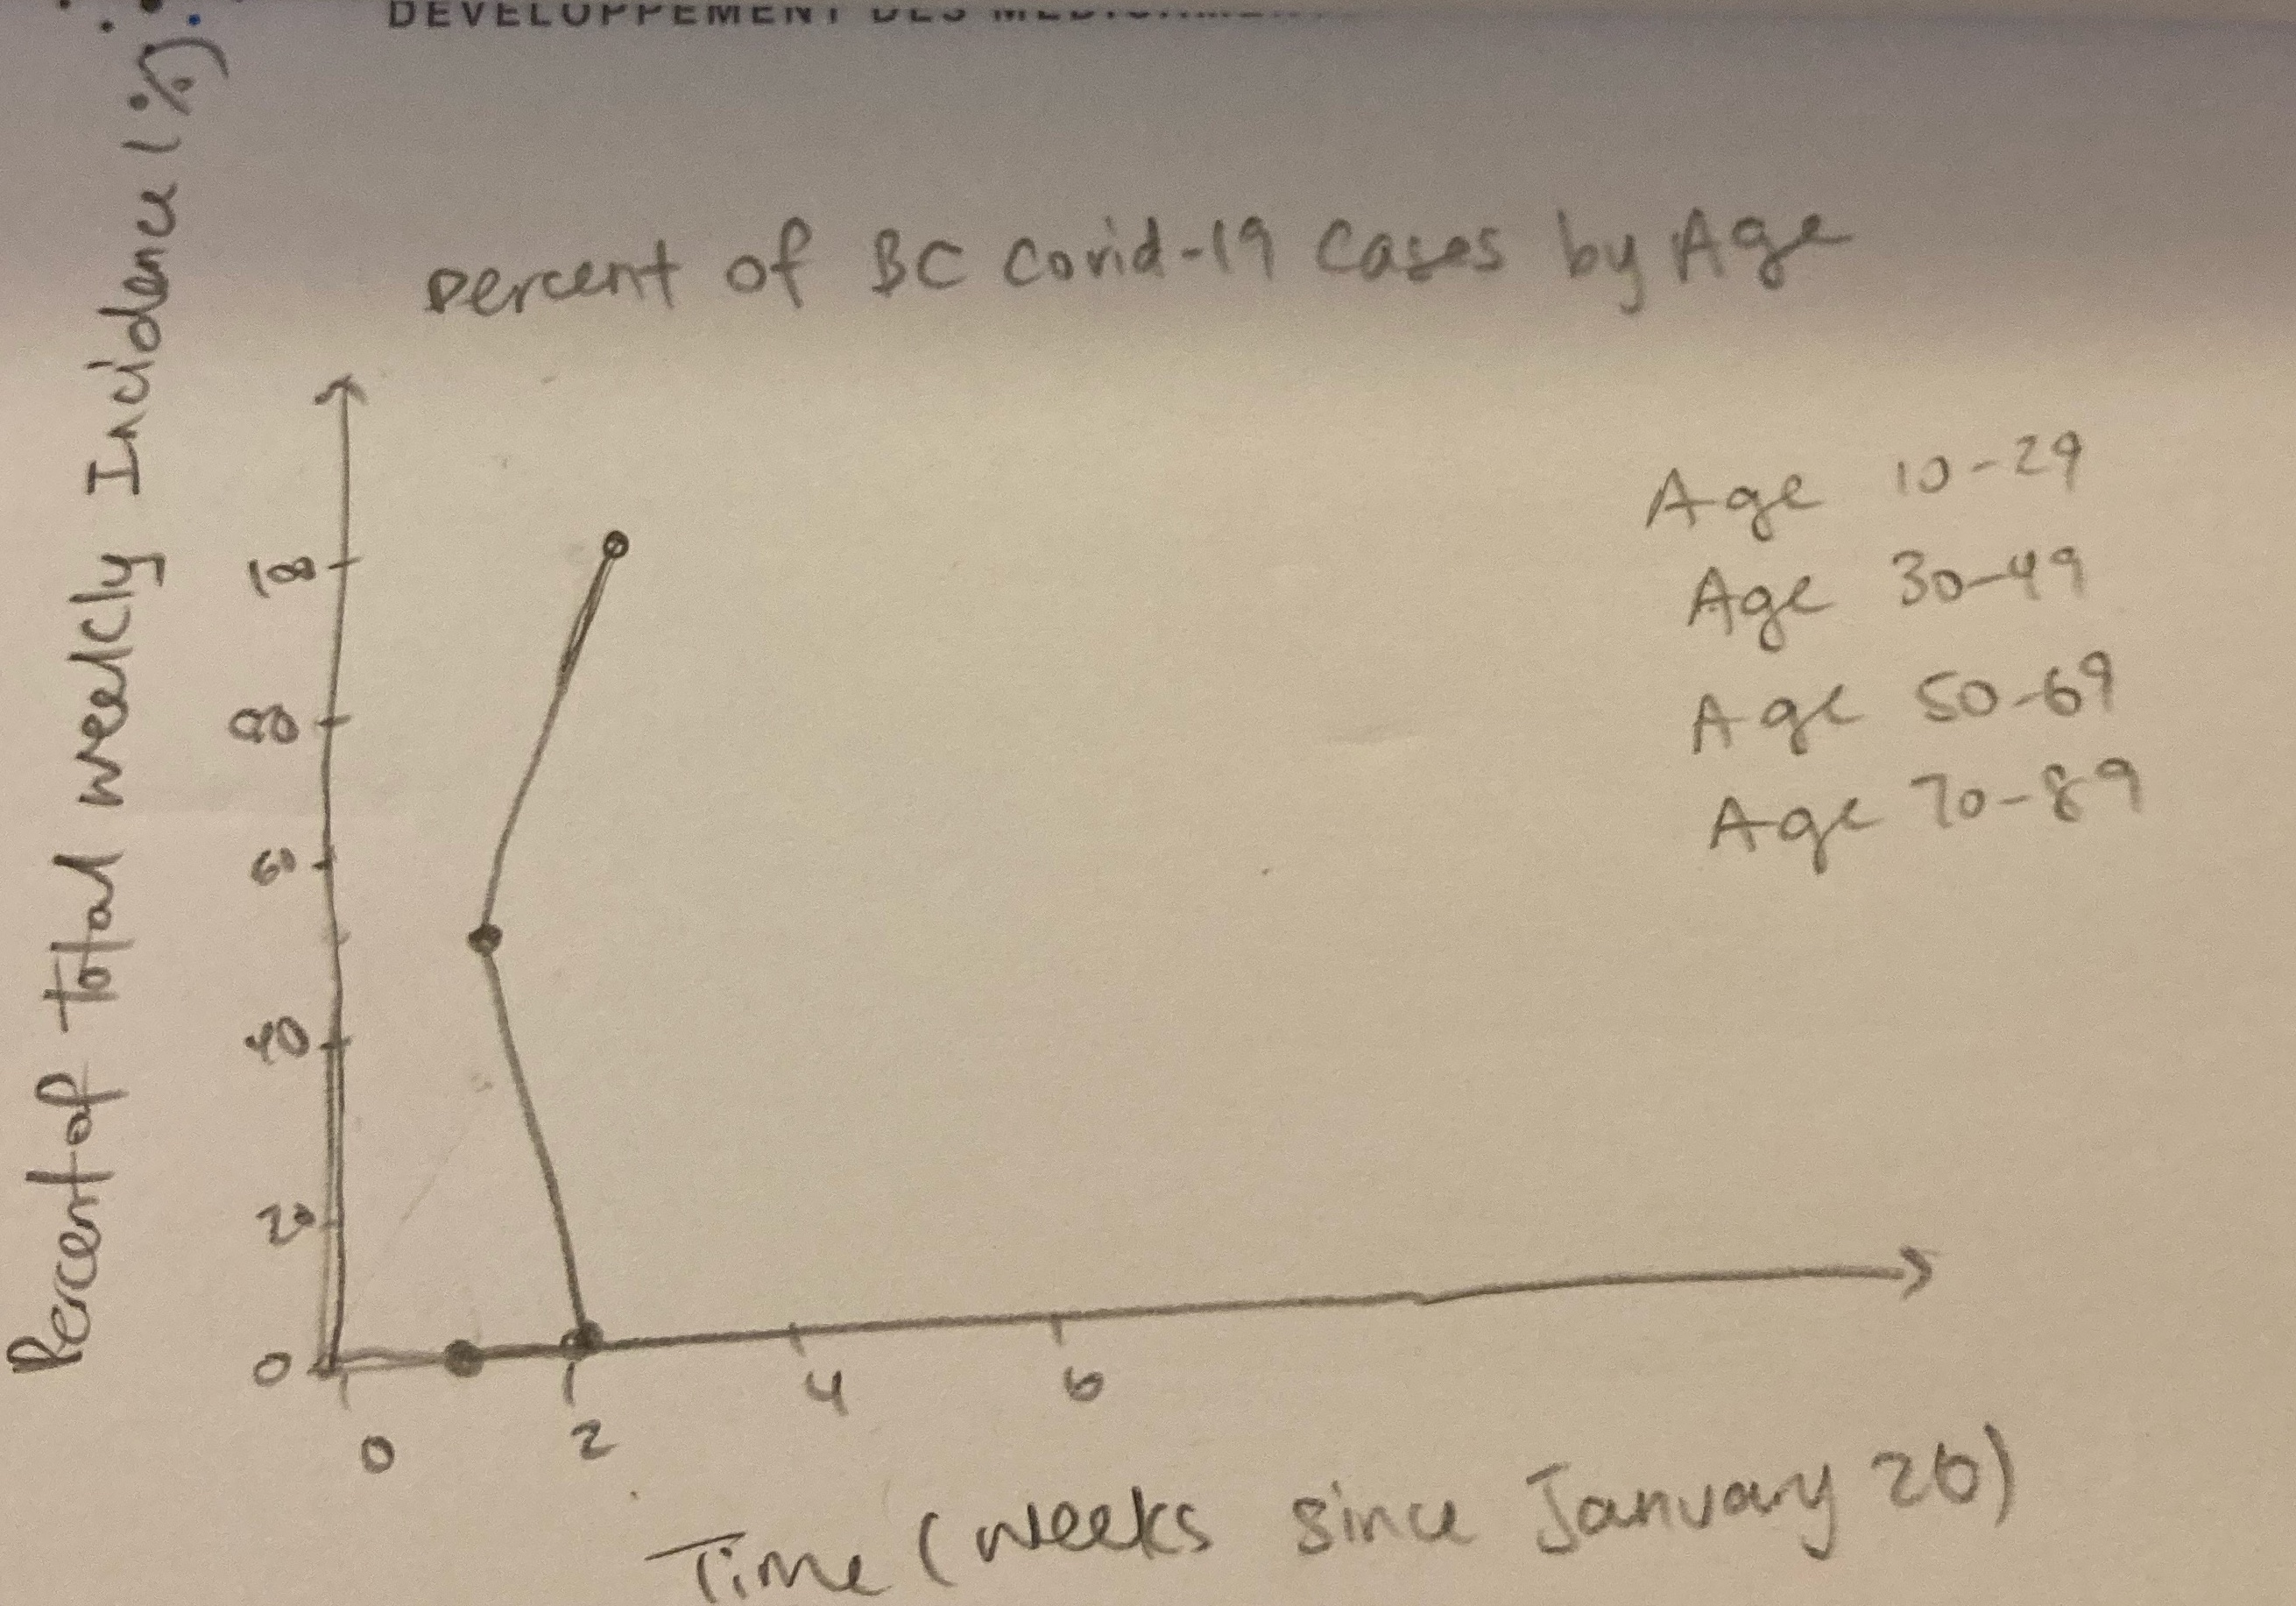
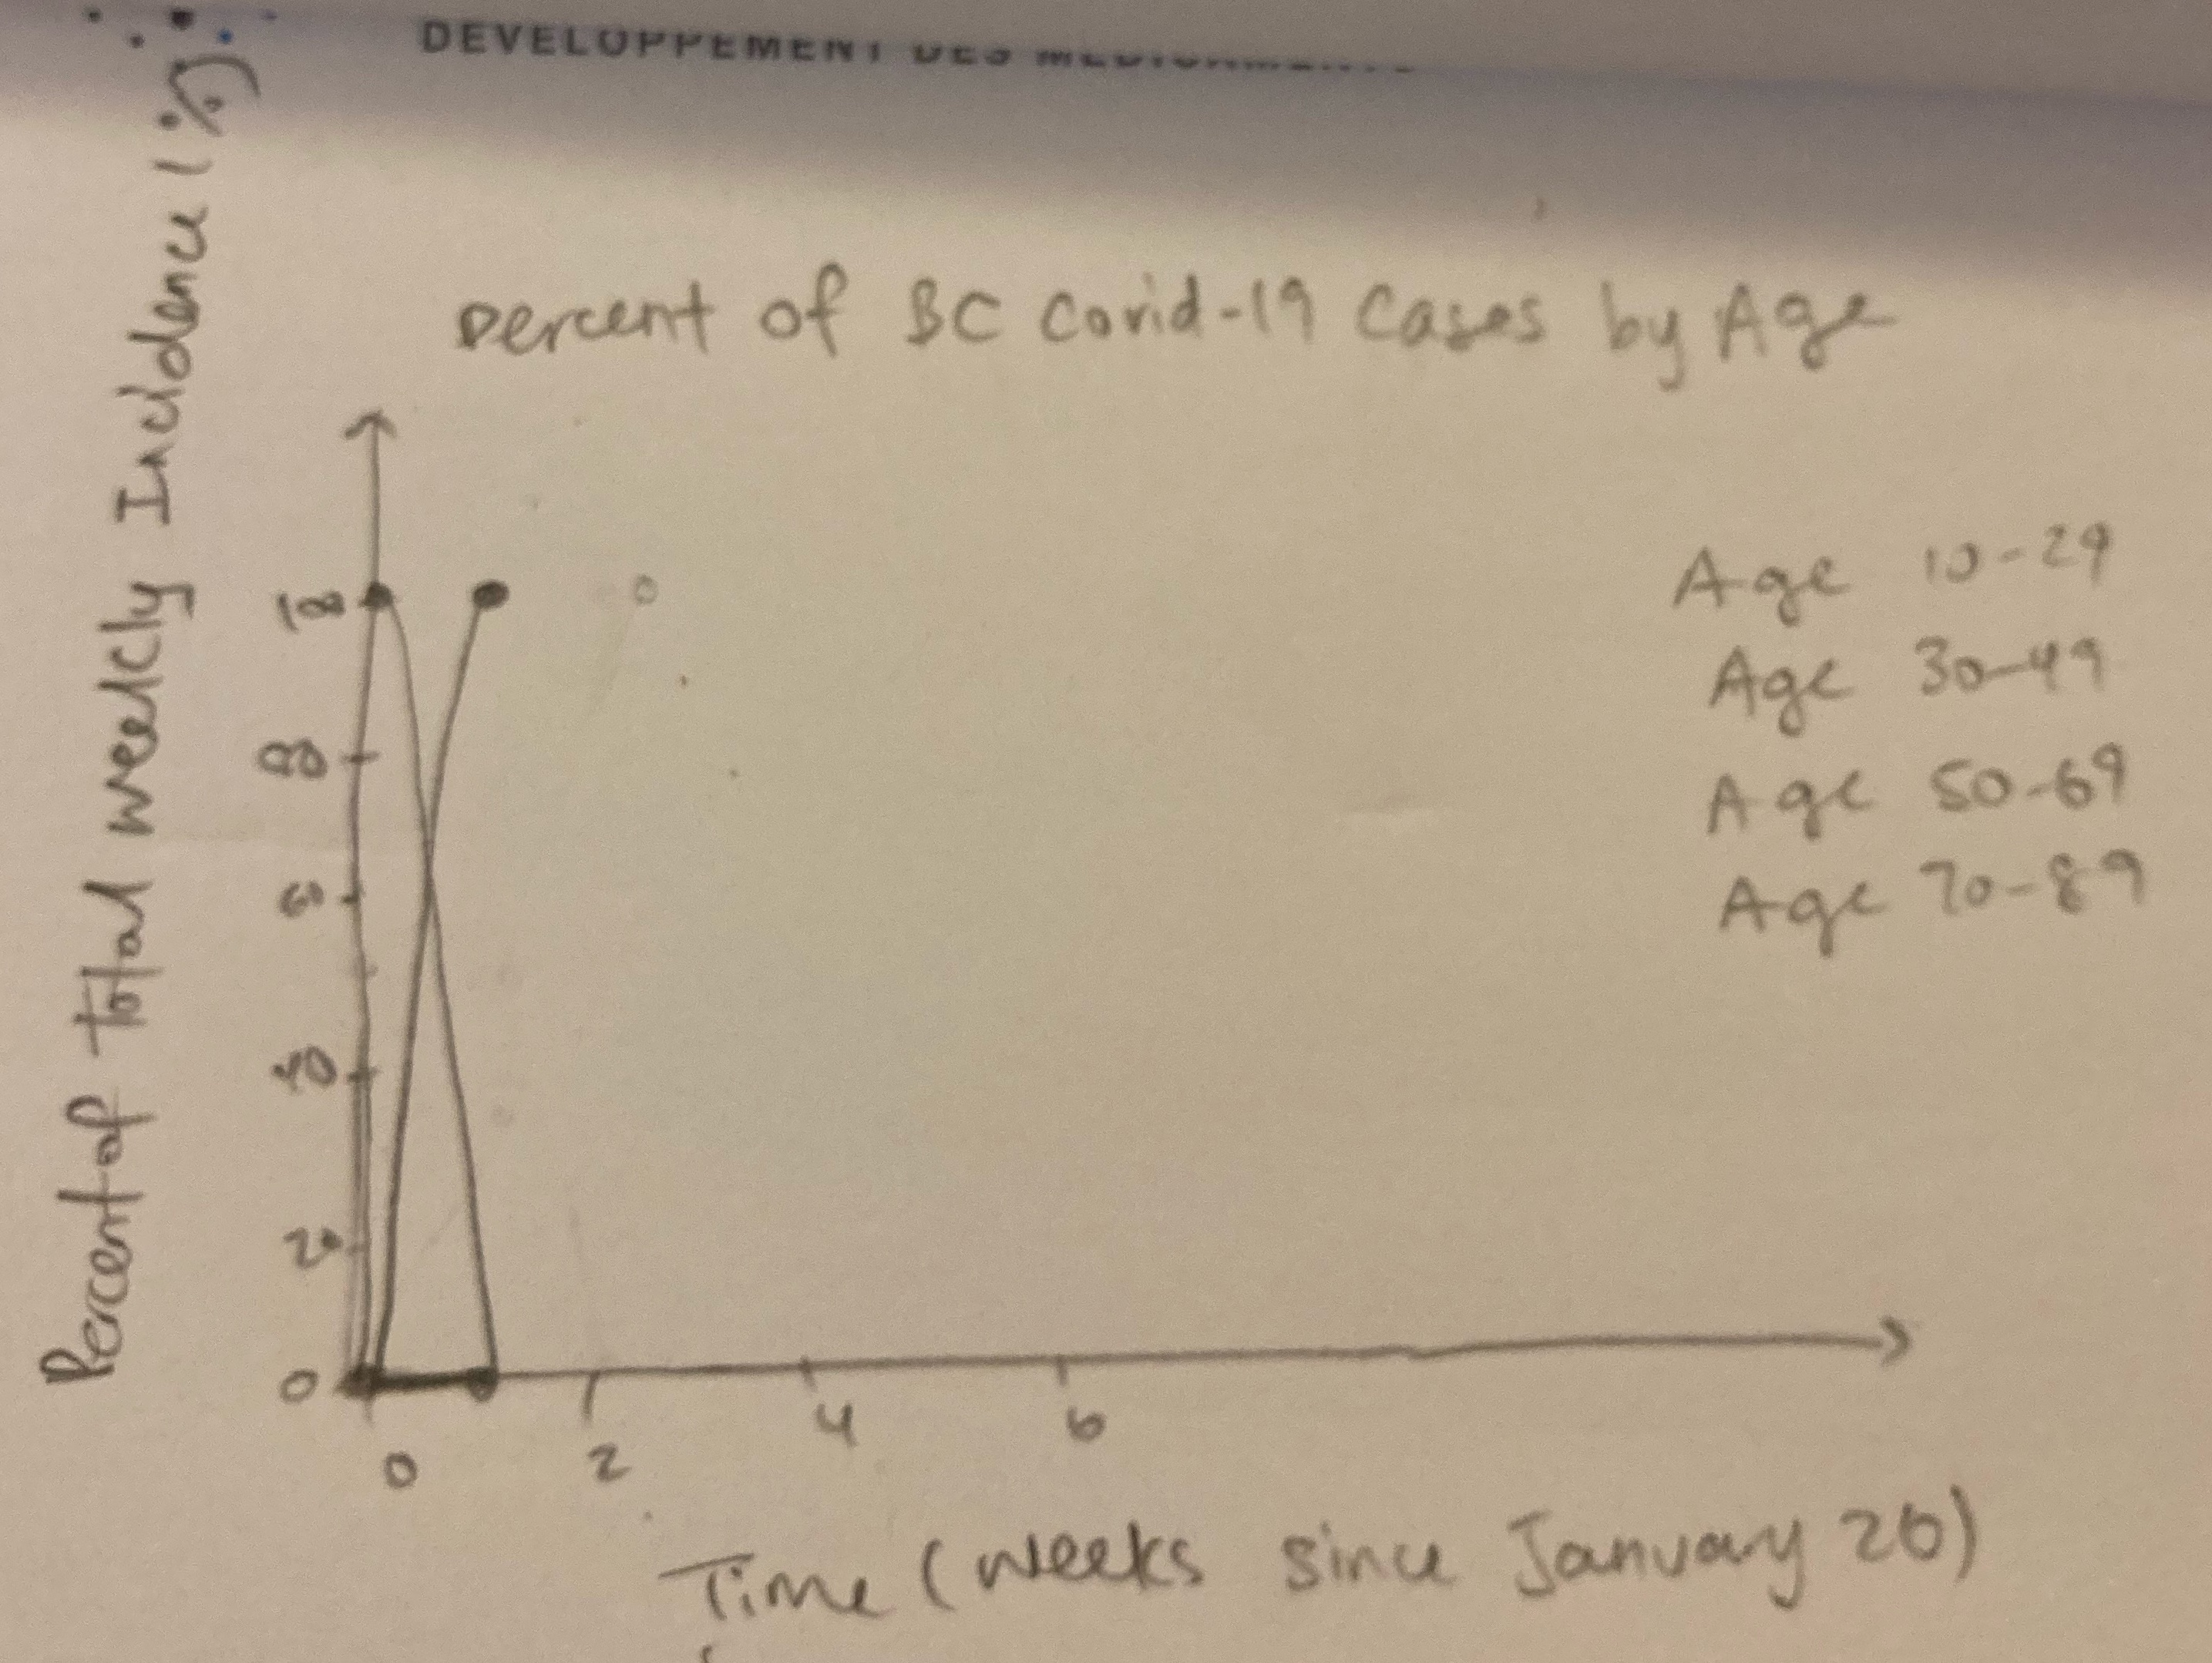

In [ ]:
###########
# Function for main

@typecheck
def main(filename: str) -> None:
    """
    Reads the file from given filename, analyzes the data, returns the result 
    """
    # Template from HtDAP, based on function composition 
    return plot_percent_incidence_over_time_by_age(read(filename)) 
    
# Examples and tests for main

start_testing()

expect(main("BC_Covid_Test_1.csv"), None)
expect(main("BC_Covid_Test_2.csv"), None)

summary()

### Final Graph/Chart

Now that everything is working, you **must** call `main` on the intended information source in order to display the final graph/chart:

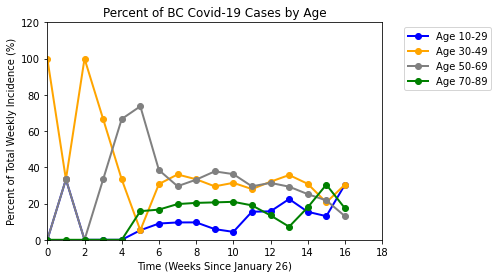

In [6]:
main("bc_covid.csv")

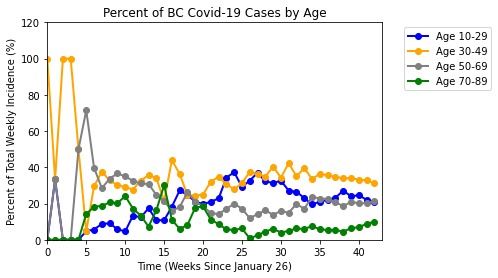

In [21]:
main("BCCDC_COVID19_Dashboard_Case_Details.csv")

In [1]:
# Be sure to select ALL THE FILES YOU NEED (including csv's) 
# when you submit. As usual, you cannot edit this cell.
# Instead, run this cell to start the submission process.
from cs103 import submit

COURSE = 53525
ASSIGNMENT = 596984 # Final submission

submit(COURSE, ASSIGNMENT)

# If your submission fails, SUBMIT by downloading your files and uploading them 
# to Canvas. You can learn how on the page "How to submit your Jupyter notebook" 
# on our Canvas site.

Valid(value=True, description='Token')

SelectMultiple(description='Files', index=(0,), layout=Layout(height='100%', width='50%'), options=('project_m…

Button(description='submit', icon='check', style=ButtonStyle(), tooltip='submit')

We are about to submit the files:
project_final_submission_template.ipynb, bc_covid.csv, BC_Covid_Test_2.csv, BC_Covid_Test_1.csv, BCCDC_COVID19_Dashboard_Case_Details.csv

- We do this by moving only the files you selected to their own space, restarting a kernel,
  and running them from top to bottom.
- This ensures that the files you submit are exactly what the course staff needs to recreate your output.
- We then submit these to Canvas for you and, if successful, give you a link where you can review your submission.
- If there is an error, there will be a VERY LONG error message below.
  Read our suggestions at the bottom and try to ream the error message bottom up.

-----------------------------------------------------------------------------------------------

[NbConvertApp] Converting notebook project_final_submission_template.ipynb to html
[NbConvertApp] Executing notebook with kernel: python3
[NbConvertApp] ERROR | Timeout waiting for execute reply (30s).
Traceback (most recent